In [1]:
%matplotlib inline

from math import *
from pylab import *

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
BITS_PER_SAMPLE = 16        # bits
# SAMPLE_RATE     = 125e6     # Hz
SAMPLE_RATE     = 5e6     # Hz

### 0. Helper Functions

In [3]:
def bytes_from_bin_file(fileName, chunkSize=2):
    with open(fileName, 'rb') as f:
        while True:
            chunk = f.read(chunkSize)
            if chunk:
                yield chunk
            else:
                break

### 1. Data Analysis

##### 1.1 Calculations

#### 1.2 Data & Graphs

In [4]:
units = 'RAW'
# units = 'VOLTS'

dataDate = '2024_07_10/'

# dataFileName = 'data_file_2024-04-30_03-19-02'
dataFileName = 'data_file_2024-04-30_03-53-40'

dataFilePath = dataDate + dataFileName

signal_num_a = []
for chunk in bytes_from_bin_file(dataFilePath + '.bin'):
    signal_num_a.append(int.from_bytes(chunk, byteorder='little', signed=True))

In [5]:
# data properties

nSamples = len(signal_num_a)
tSamples = (nSamples / SAMPLE_RATE) * 1e6

print('Sampling time = {} μs'.format(tSamples))
print('Number of samples saved = {}'.format(nSamples))

t = np.linspace(0, tSamples, nSamples)

Sampling time = 2009.2 μs
Number of samples saved = 10046


In [6]:
cutoff = 100

signal_num_a = signal_num_a[cutoff:]
t = t[cutoff:]

#### 1.3 Noise Distribution

In [7]:
## CONFIGURATION

R = 50  # resistance (in Ohms)

nBins = 11
density = True

signal_num = signal_num_a
signal_num_label = 'Channel A'

In [8]:
# set units for plotting
units_plot = ''
if units == 'VOLTS':
    signal_num *= 1e3
    units_plot = 'mV'
elif units == 'RAW':
    units_plot = 'bits'

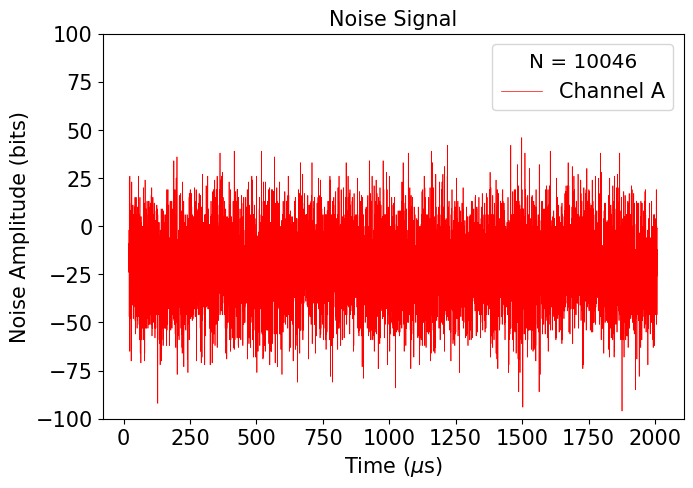

In [9]:
plt.figure(figsize=(7.5, 5))

plt.plot(t, signal_num, '-r', lw=0.5, label="Channel A")

plt.title('Noise Signal', fontsize=15)
plt.xlabel(r'Time ($\mu$s)', fontsize=15)
plt.ylabel(f'Noise Amplitude ({units_plot})', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylim(-100,100)

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 15})

plt.show()

In [10]:
bins_range = np.arange(min(signal_num)-0.5, max(signal_num)+0.5, 1)

In [11]:
# calculate histogram
if units == 'VOLTS':
    hist, bins = np.histogram(signal_num, bins=nBins, density=density)
elif units == 'RAW':
    hist, bins = np.histogram(signal_num, bins=bins_range, density=density)

bin_centers = (bins[1:] + bins[:-1]) * 0.5

# fit Gaussian
mu, sigma = sp.stats.norm.fit(signal_num)
x = np.linspace(bin_centers[0], bin_centers[-1], 100)
p = sp.stats.norm.pdf(x, mu, sigma)

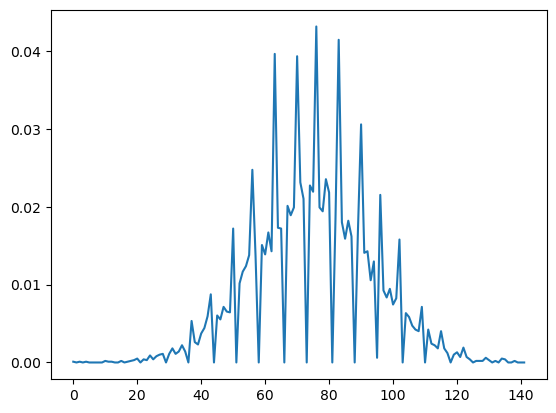

In [12]:
plt.plot(hist)

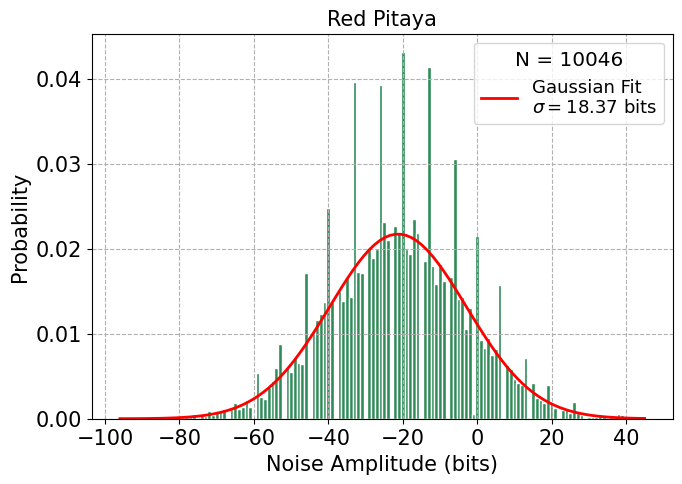

In [13]:
plt.figure(figsize=(7.5, 5))

if units == 'VOLTS':
    plt.hist(signal_num, bins=nBins, density=density, color='seagreen', edgecolor='w')    
elif units == 'RAW':
    plt.hist(signal_num, bins=bins_range, density=density, color='seagreen', edgecolor='w')

plt.plot(x, p, '-r', lw=2, label='Gaussian Fit\n'+rf'$\sigma = {sigma:.2f}$ {units_plot}')

plt.title('Red Pitaya', fontsize=15)
plt.xlabel(f'Noise Amplitude ({units_plot})', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.xlim(-40, -20)

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 13})

plt.grid(ls='--')
plt.show()